### A notebook just for graphs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [5]:
df_melted = pd.read_csv(r'C:\Users\grazk\Documents\Git_project\Final-project\df_melted.csv')
#I went the simples way and uploaded dataframe from my pc. Kept the name df_melted so it can be coppied to your notebook no problem

In [6]:
#checking which are most produced in tons
most_produced=df_melted.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False)
most_produced.head(10)
#Surprisingly,  sugar beet is no 1

,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
Item,,,,
"Cereals, Total",5358896452,67902707,18530037826,6790.24
Sugar Crops Primary,202238673,640078744,8483854539,64007.99
Sugar beet,201908668,639731291,8461256394,63973.28
Wheat,2350593397,68503215,8288422540,6850.21
"Roots and Tubers, Total",380659074,381499563,6981021890,38149.95
Potatoes,379950580,382042314,6973033314,38204.31
Fruit Primary,469114651,3652384440,4337886890,365238.52
Barley,1289035236,59009188,4163388325,5901.11
Vegetables Primary,207493015,396051964,3984466223,39605.33


In [7]:
#could be skewed due to the fact that unequal number of years might be available for some items. Checking just 2019
most_produced_2019 = df_melted.loc[df_melted['Year'] == '2019-01-01']
most_produced_2019.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False).head(10)


,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
Item,,,,
"Cereals, Total",121096357,2080874,543061049,208.11
Wheat,62385441,1949675,266122709,194.98
Sugar beet,3166508,17551487,194460403,1755.17
Sugar Crops Primary,3166508,17551487,194460403,1755.17
Maize,18353189,2374605,132773194,237.46
"Roots and Tubers, Total",4696611,10232783,107271603,1023.30
Potatoes,4696336,10232490,107264935,1023.27
Barley,24222012,1772530,95634161,177.30
Oilcrops,40433293,981627,89217783,98.15


#### Top 5 were:
* Wheat
* Sugar beet
* Maize
* Potatoes
* Barley
#### Sugar beet not directly for food, barley I assume might be mostly for beer, so not food either.
#### This leaves 3 main food items: wheat, potatoes, maize

In [8]:
#very long name, looks ugly in the figure
most_produced_2019.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace= True)

C:\Users\grazk\AppData\Local\Temp\ipykernel_24408\3408949803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_produced_2019.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace= True)


In [9]:
#Staple food production by country
wheat_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Wheat'].sort_values(by = 'Production_t', ascending = False)
potato_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Potatoes'].sort_values(by = 'Production_t', ascending = False)
Maize_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Maize'].sort_values(by = 'Production_t', ascending = False)

#I wanted to make simple choise input (As in "which major agricultural product do you want to see, select ... etc")
#And then make if else loop that would make dataframe based on the choise and proceed to figure.
# But for whatever reason the cell runs forever and won't execute the code. Ended up simply making dataframes, no user choice provided
#this is not  efficient I guess as new variables are created. Working on making it nicer


In [10]:
def barplot_by_country(df_name, title = ''):
    fig1 = sns.barplot(data=df_name, x= "Country", y= "Production_t")
    plt.xlabel("Country")
    plt.ylabel("Production, tons")
    plt.xticks(rotation = 90)
    plt.title(title)
    
    return fig1



<AxesSubplot: title={'center': 'Wheat production'}, xlabel='Country', ylabel='Production, tons'>

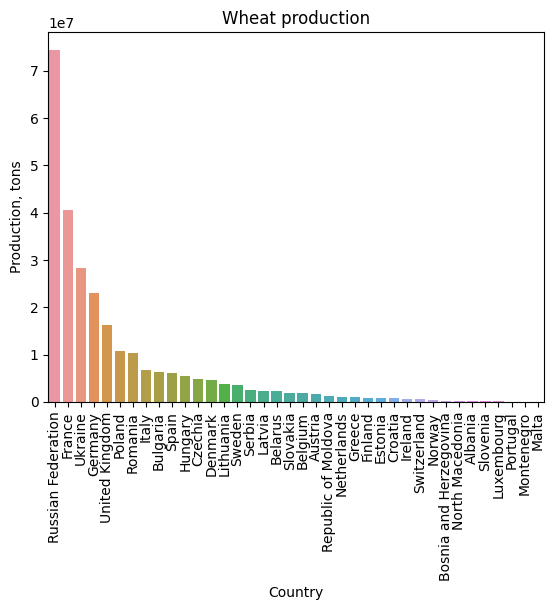

In [11]:
barplot_by_country(wheat_production_XXI, 'Wheat production')


<AxesSubplot: title={'center': 'Maize production'}, xlabel='Country', ylabel='Production, tons'>

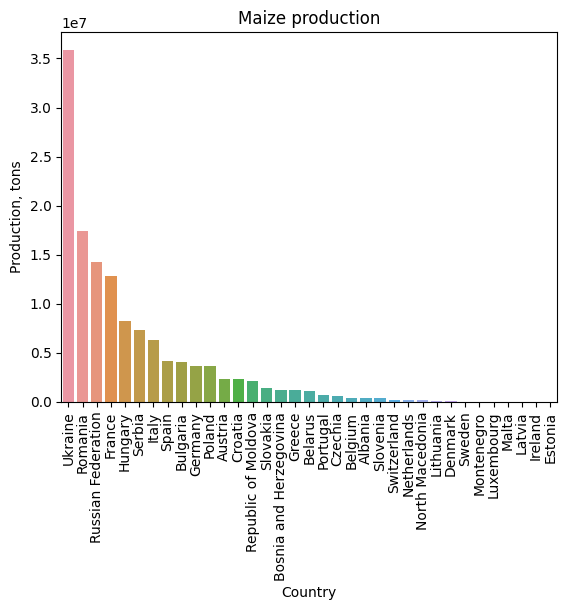

In [12]:
barplot_by_country(Maize_production_XXI, 'Maize production')

<AxesSubplot: title={'center': 'Potato production'}, xlabel='Country', ylabel='Production, tons'>

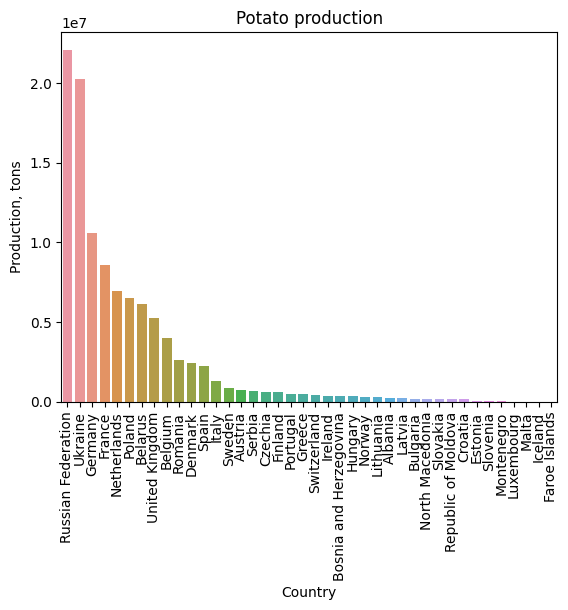

In [13]:
barplot_by_country(potato_production_XXI, 'Potato production')